<a href="https://colab.research.google.com/github/hunaiva-kintan/Data-Mining-Projects/blob/main/Study_Case_4_Group_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Studi Kasus Korelasi dan Regresi
Kelompok D :
1. Salsabilla - 2006463856
2. Jasmine Husna Sanditya - 2006571034
3. Nabila Safitri - 1906299540
4. Gaby Fionna Yossudarso - 1906375650
5. Bintang anugrah alam - 2006571173
6. Nurul Annisa - 1906377864
7. Hunaiva Kintan - 1906375695







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate

In [ ]:
file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)
df.head()

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


# **Data Preprocessing**

In [ ]:
# Copy Data
df2 = df.copy()

**Missing Values**

In [ ]:
# Get Total Missing Values
print(df2.isnull().sum())

meter_reading            0
primary_use              0
square_feet              0
year_built             750
floor_count           1061
air_temperature          0
cloud_coverage          17
dew_temperature          0
precip_depth_1_hr      176
sea_level_pressure      89
wind_direction           0
wind_speed               0
dtype: int64


In [ ]:
# Proportion Missing Values for every colomn
df2.isnull().sum()/df2.shape[0]

meter_reading         0.000000
primary_use           0.000000
square_feet           0.000000
year_built            0.530786
floor_count           0.750885
air_temperature       0.000000
cloud_coverage        0.012031
dew_temperature       0.000000
precip_depth_1_hr     0.124558
sea_level_pressure    0.062987
wind_direction        0.000000
wind_speed            0.000000
dtype: float64

Terdapat beberapa missing values pada beberapa kolom
Untuk kolom hadap yang memiliki lebih dari 50% missing values akan dihandle dengan melakukan drop kolom.

In [ ]:
# Drop baris variabel cloud_coverage, precip_depth_1_hr, sea_level_pressure
df2_non_null = df2.dropna(subset  = ['cloud_coverage','precip_depth_1_hr','sea_level_pressure'])

In [ ]:
# Drop kolom
df2_non_null.drop(columns = 'year_built', inplace = True)
df2_non_null.drop(columns = 'floor_count', inplace = True)

In [ ]:
# Get Total Missing Values
print(df2_non_null.isnull().sum())

meter_reading         0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64


**Mengganti tipe data**

tipe data variabel primary use seharusnya category dan variabel square feet seharusnya integer

In [ ]:
df2_non_null['primary_use'] = df2_non_null['primary_use'].astype('category')
df2_non_null['square_feet'] = df2_non_null['square_feet'].astype('int64')

In [ ]:
df2_non_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1412
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   meter_reading       1220 non-null   float64 
 1   primary_use         1220 non-null   category
 2   square_feet         1220 non-null   int64   
 3   air_temperature     1220 non-null   float64 
 4   cloud_coverage      1220 non-null   float64 
 5   dew_temperature     1220 non-null   float64 
 6   precip_depth_1_hr   1220 non-null   float64 
 7   sea_level_pressure  1220 non-null   float64 
 8   wind_direction      1220 non-null   float64 
 9   wind_speed          1220 non-null   float64 
dtypes: category(1), float64(8), int64(1)
memory usage: 97.2 KB


**Mendeteksi Data Duplikat**

In [ ]:
print('Duplicated Values :')
print(df2_non_null.duplicated().sum())

Duplicated Values :
0


Note : tidak terdapat data yang duplikat

**Scalling Data**

Data perlu dilakukan scalling agar bisa mendapatkan insight yang baik

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2_non_null[['meter_reading', 'square_feet', 'air_temperature','dew_temperature','sea_level_pressure', 'wind_direction']] = scaler.fit_transform(df2_non_null[['meter_reading', 'square_feet', 'air_temperature','dew_temperature','sea_level_pressure', 'wind_direction']])
df2_non_null.head()
# Continue to Modelling

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0.069245,Education,0.008173,0.860312,2.998727,1.0,1.240589,0.984487,0.354735,3.391472
1,0.034502,Education,0.002786,0.860312,2.998727,1.0,1.240589,0.984487,0.354735,3.391472
2,0.006833,Education,0.005822,0.860312,2.998727,1.0,1.240589,0.984487,0.354735,3.391472
3,0.111505,Education,0.026754,0.860312,2.998727,1.0,1.240589,0.984487,0.354735,3.391472
4,0.460240,Education,0.132985,0.860312,2.998727,1.0,1.240589,0.984487,0.354735,3.391472


**Mendeteksi outlier pada data**

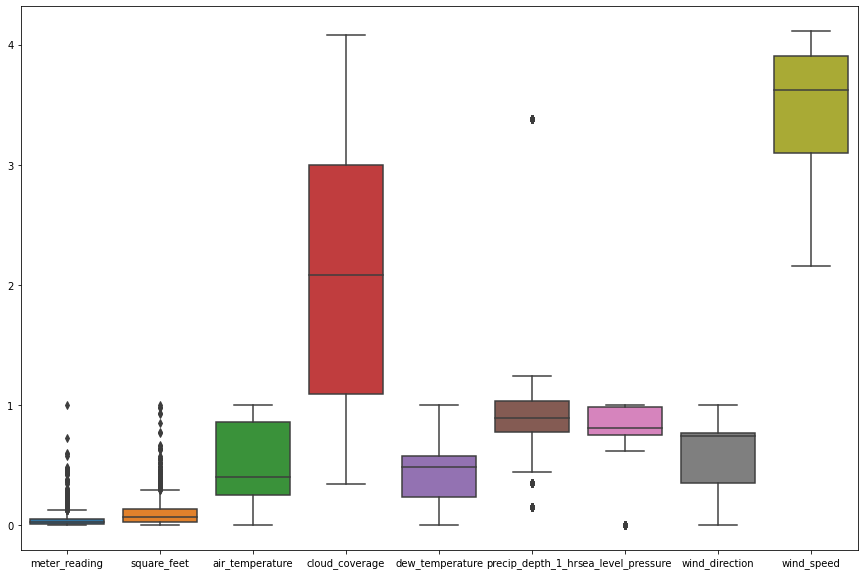

In [ ]:
plt.figure(figsize=(15, 10))
p = sns.boxplot(data = df2_non_null)

Rekomendasi tindak lanjut dari hasil ini untuk regresi?

In [ ]:
ilangin_outlier = np.abs(df2_non_null.meter_reading - df2_non_null.meter_reading.mean())<=(2*df2_non_null.meter_reading.std())
outlier1 = np.abs(df2_non_null.square_feet - df2_non_null.square_feet.mean())<=(2*df2_non_null.square_feet.std())


df2_non_outlier = df2_non_null[ilangin_outlier]
df2_non_outlier = df2_non_outlier[outlier1]

In [ ]:
df2_non_outlier.head()

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0.069245,Education,0.008173,0.860312,2.998727,1.0,1.240589,0.984487,0.354735,3.391472
1,0.034502,Education,0.002786,0.860312,2.998727,1.0,1.240589,0.984487,0.354735,3.391472
2,0.006833,Education,0.005822,0.860312,2.998727,1.0,1.240589,0.984487,0.354735,3.391472
3,0.111505,Education,0.026754,0.860312,2.998727,1.0,1.240589,0.984487,0.354735,3.391472
5,0.008388,Education,0.008822,0.860312,2.998727,1.0,1.240589,0.984487,0.354735,3.391472


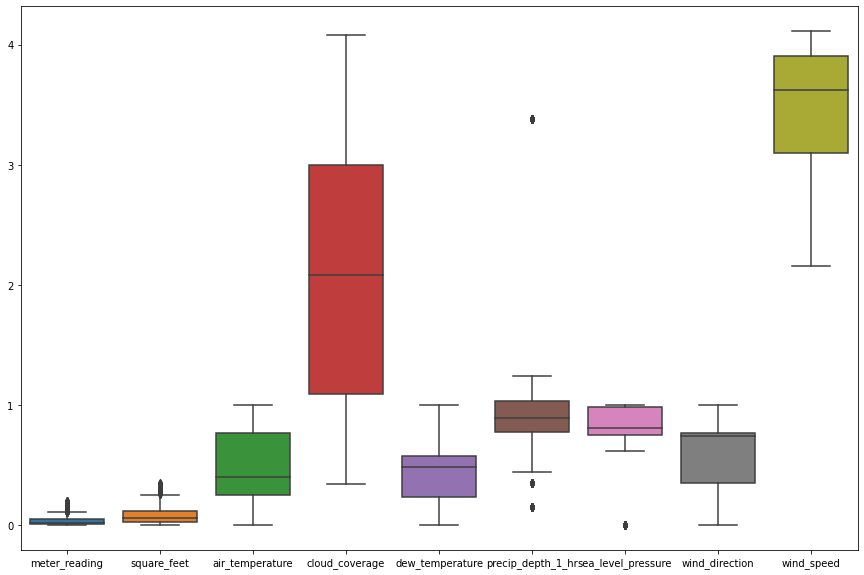

In [ ]:
plt.figure(figsize=(15, 10))
p = sns.boxplot(data = df2_non_outlier)

## EDA

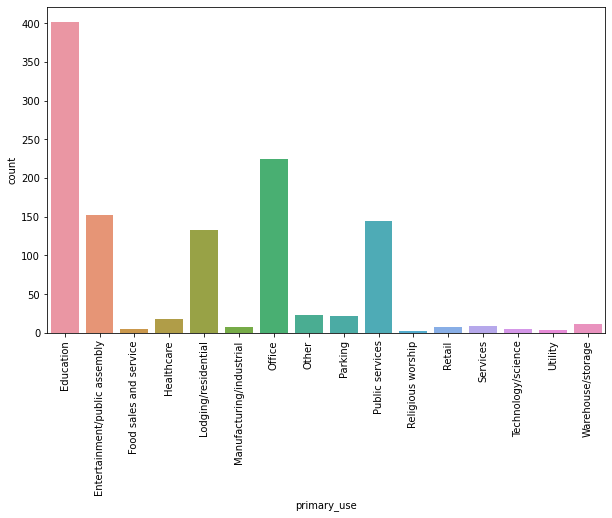

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='primary_use',data=df2_non_outlier)
plt.xticks(rotation='vertical')
plt.show()

berdasarkan visualisasi, diketahui bahwa perusahaan mayoritas mengalokasikan pembangunan pada bidang pendidikan. Kedepannya, perusahaan dapat mempertimbangkan untuk mengalokasikan pembangunan ke bidang lain yang tidak kalah penting untuk menggunakan bangunan low energy seperti pada bidang healthcare yang jumlahnya cenderung sedikit dibandingkan dengan education, serta bisa juga dialokasikan pada bidang manufacturing dan retail.
pertimbangan pengalokasian pada retail karena bisa berpengaruh kepada keuntungan yang diperoleh dengan biaya operasional yang lebih rendah sehingga perputaran biaya yang digunakan dapat lebih besar untuk dialihkan ke sektor lain di bidang retail

Argumen pendukung rekomendasi? Jenis penggunaan bangunan semestinya ada kajian berdasarkan kebutuhan masyarakat?

<Figure size 720x432 with 0 Axes>

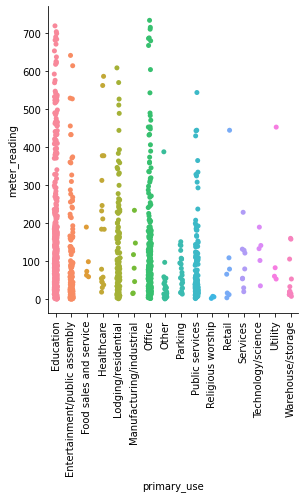

In [ ]:
plt.figure(figsize=(10,6))
sns.catplot(x="primary_use", y="meter_reading", data=df2_non_outlier)
plt.xticks(rotation='vertical')
plt.show()

berdasarkan visualisasi dengan scatter plot, dapat diketahui penggunaan energi terbesar ada di bidang edukasi dan perkantoran. Hal ini dapat menunjukkan jumlah populasi dan pengguna pada dua bidang ini dapat dikatakan terbesar dibandingkan dengan sektor lain.

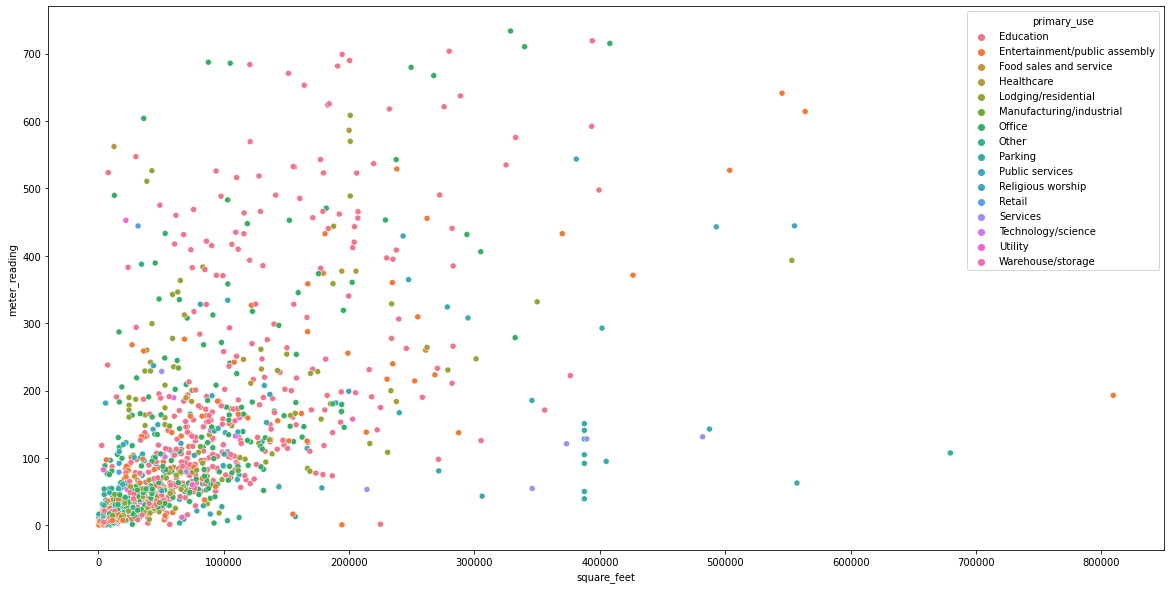

In [ ]:
f, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x=df2_non_outlier['square_feet'], y=df2_non_outlier['meter_reading'], hue=df2_non_outlier['primary_use'])

berdasarkan hasil visualisasi, terlihat pola persebaran antara luas bangunan (square feet) terhadap penggunaan listrik (meter reading)


So? Kaitannya dengan regresi yang akan dilakukan?

## KORELASI

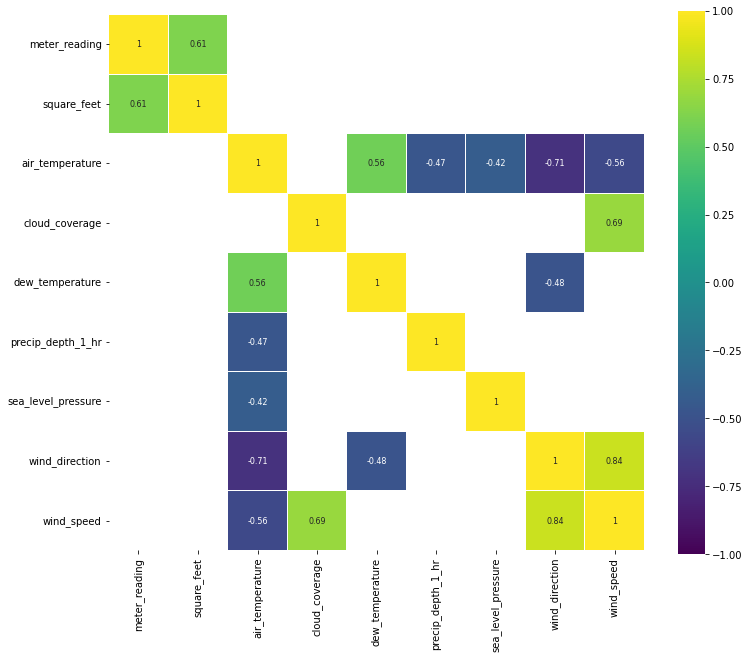

In [ ]:
# HeatMap untuk menyelidiki korelasi
corr2 = df2_non_outlier.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Rekomendasi tindak lanjut dari hasil ini untuk regresi?

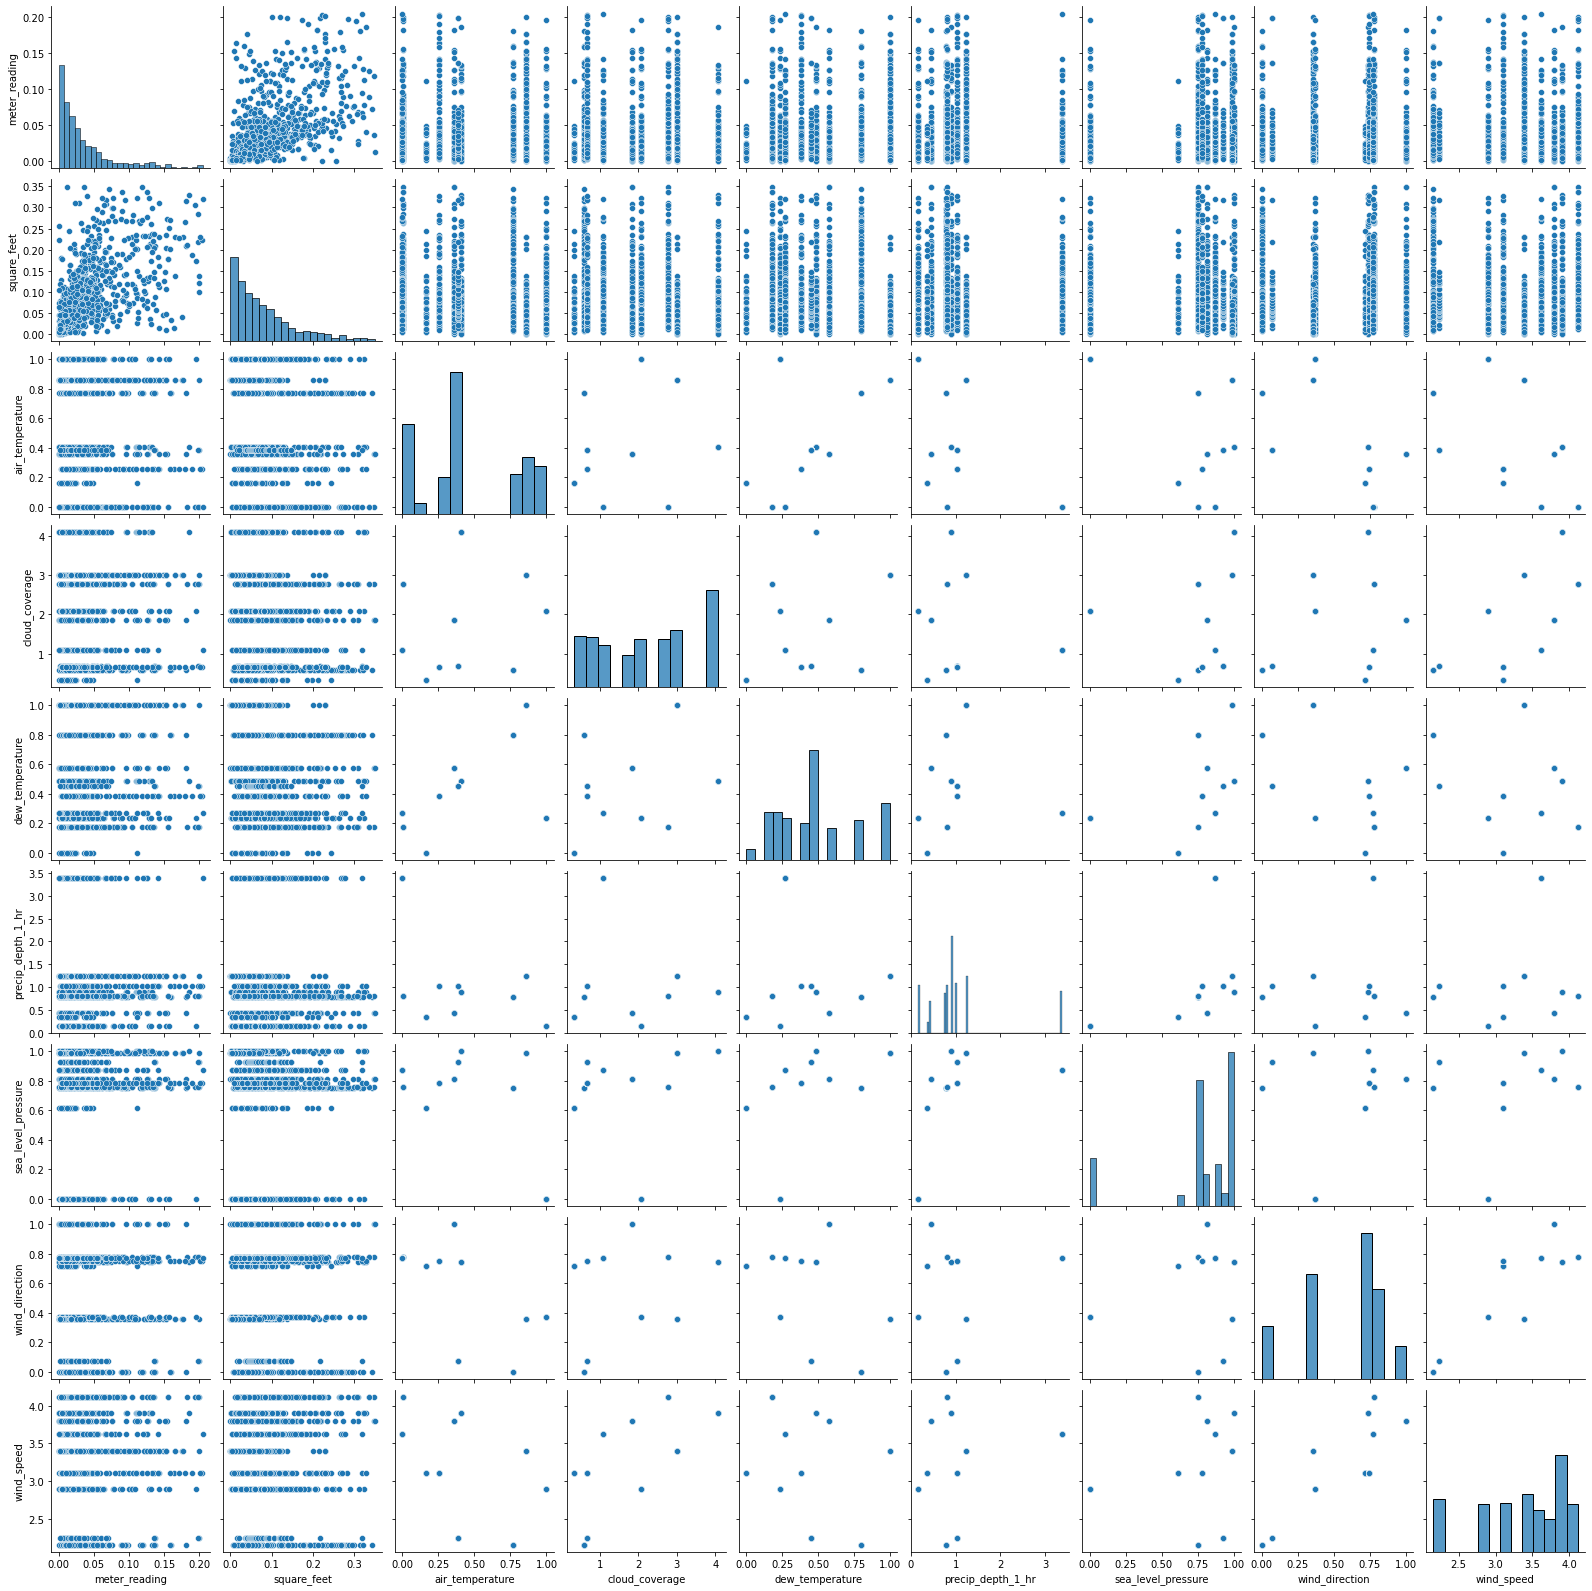

In [ ]:
# Korelasi dan Scatter Plot untuk melihat datanya
p = sns.pairplot(df2_non_outlier)

Info apa yang bisa diperoleh dari hasil ini? Rekomendasi tindak lanjut dari hasil ini untuk regresi?

## Uji Asumsi Regresi

In [ ]:
import warnings; warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

In [ ]:
#Model Regresi#
res = smf.ols(formula='meter_reading ~ C(primary_use) + square_feet + air_temperature + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed', data=df2_non_outlier).fit()

In [ ]:
### Uji Normalitas Jarque Bera ###

print(stats.jarque_bera(res.resid_pearson))

Jarque_beraResult(statistic=1281.22117430166, pvalue=0.0)


Berdasarkan Uji Jarque Bera di atas, diperoleh nilai p-value = 0.00 < alpha = 0.05, maka residual dari model tidak berdistribusi normal.

So? Konsekuensinya, atau upaya penanganannya?

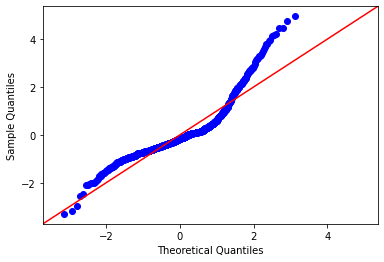

In [ ]:
### Uji Normalitas QQ Plot ###

ax = sm.qqplot(res.resid_pearson, line='45')

plt.show()

Berdasarkan QQ Plot di atas dapat terlihat bahwa residual model tidak berdistribusi normal.

In [ ]:
### Uji Autokorelasi Durbin Watson ###

print('Durbin watson test stat: ', durbin_watson(res.resid_pearson))

Durbin watson test stat:  1.6335413706903867


Berdasarkan Uji Durbin Watson di atas, diperoleh nilai statistik Durbin Watson = 1.6335413706903867. Maka dapat disimpulkan bahwa residual model independen.

In [ ]:
### Uji Heteroskedastisitas White Test ###

white_test = het_white(res.resid_pearson, res.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, white_test)))

{'Test Statistic': 255.84466576490803, 'Test Statistic p-value': 1.2787242559594298e-15, 'F-Statistic': 3.011640503257389, 'F-Test p-value': 1.8751053208913206e-18}


Berdasarkan Uji White di atas, diperoleh nilai p-value = 1.2787242559594298e-15 < 0.05 = alpha, sehingga dapat disimpulkan bahwa terdapat heteroskedastisitas pada model.

## ANALISIS REGRESI

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     39.24
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          6.97e-126
Time:                        09:16:31   Log-Likelihood:                 2338.8
No. Observations:                1130   AIC:                            -4630.
Df Residuals:                    1106   BIC:                            -4509.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Dari model awal diatas, didapatkan bahwa F-statistic model < 0,05. Hal tersebut menandakan model berguna. Beberapa variabel memiliki kecenderungan mempengaruhi nilai meter_reading atau nilai penggunaan listriknya, contohnya beberapa kategori dari variabel primary_use, square_feet, air_temperature, cloud_coverage, dew_temperature, sea_level_presure, wind_direction, dan wind_speed. Variabel precip_depth_1_hr tidak signidikan mempengaruhi penggunaan listrik, maka akan dihilangkan dari model.

In [ ]:
df2_non_outlier['primary_use'].value_counts()

Education                        394
Office                           220
Entertainment/public assembly    146
Public services                  139
Lodging/residential              131
Other                             64
Retail                             7
Manufacturing/industrial           7
Food sales and service             5
Technology/science                 5
Services                           5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

Rekomendasi tindak lanjut dari hasil ini untuk regresi?

In [ ]:
def group_use(primary_use):

    mapping = {
        'Healthcare':'Other',
        'Retail' : 'Other',
        'Warehouse/storage': 'Other',
        'Parking':'Other',
        'Manufacturing/industrial':'Other',
        'Food sales and service' : 'Other',
        'Technology/science' : 'Other',
        'Services' : 'Other',
        'Utility' : 'Other',
        'Religious worship' : 'Other'
    }

    try:
        return mapping[primary_use]
    except:
        return primary_use

df2_non_outlier['primary_use'] = df2_non_outlier['primary_use'].apply(group_use)

In [ ]:
df2_non_outlier['primary_use'].value_counts()

Education                        394
Office                           220
Entertainment/public assembly    146
Public services                  139
Lodging/residential              131
Other                            100
Name: primary_use, dtype: int64

In [ ]:
mod2 = smf.ols(formula='meter_reading ~ C(primary_use) + square_feet + air_temperature + cloud_coverage + dew_temperature + sea_level_pressure + wind_direction + wind_speed', data=df2_non_outlier).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     70.15
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          4.04e-127
Time:                        09:38:32   Log-Likelihood:                 2319.0
No. Observations:                1130   AIC:                            -4612.
Df Residuals:                    1117   BIC:                            -4547.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Model kedua dapat dikatakan lebih baik daripada model pertama karena terdapat pengelompokan kategori pada primary_use sehingga banyak variabel yang mempengaruhi penggunaan listrik.

Sehingga dapat disimpulkan bahwa variabel yang mempengaruhi penggunaan listrik antara lain adalah penggunaan bangunan untuk entertainment, lodging, dan public services. variabel lainnya adalah square_feet, air_temperature, cloud_coverage, dew_temperature, sea_level_presure, wind_direction, dan wind_speed.

Saran: apabila perusahaaan ingin membangun bangunan yang ramah energi, dapat mempertimbangkan beberapa variabel tersebut.

Bagaimana penggunaan pertimbangan dari variabel tersebut? Terutama yang terkait dengan faktor alam? Kenapa consider kedua model? Apakah diperiksa influential observation? Bagaimana dengan keberadaan outliers yang cukup banyak pada data? Apakah tidak perlu dianalisis terpisah? Bisa dicoba clustering data dahulu, just in case ada pengelompokan pada data (indikasi dari banyak outliers); kemudian jalankan regresi di masing-masing kelompok data.

In [ ]:
def forward_selected(data, response):
    """Linear model designed by forward selection.
    https://planspace.org/20150423-forward_selection_with_statsmodels/
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
model_fw = forward_selected(df , 'meter_reading')

print(model_fw.model.formula)
print(model_fw.rsquared_adj)

meter_reading ~ square_feet + floor_count + precip_depth_1_hr + 1
0.711054556712897


Berdasarkan forward selection dengan model awal, beberapa variabel yang memiliki kecenderungan mempengaruhi penggunaan listrik adalah square_feet, floor_count, dan precip_depth_1_hr. Namun model ini tidak dapat digunakan karena data yang digunakan belum melalui data processing.

In [ ]:
model_fw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          meter_reading   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     166.7
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           4.85e-54
Time:                        09:17:54   Log-Likelihood:                -1494.1
No. Observations:                 203   AIC:                             2996.
Df Residuals:                     199   BIC:                             3009.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -176.0339     38.209     -4.607      0.000    -251.381    -100.687
square_feet           0.0025      0.000      8.514      0.000       0.002       0.003
floor_count          10.7135      9.333      1.148      0.252      -7.691      29.118
precip_depth_1_hr   134.6661     12.104     11.126      0.000     110.798     158.534
==============================================================================
Omnibus:                      179.263   Durbin-Watson:                   2.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7317.875
Skew:                           2.953   Prob(JB):                         0.00
Kurtosis:                      31.815   Cond. No.                     2.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Interpretasi**



*   Dapat terlihat bahwa luas bangunan cukup berpengaruh pada besaran penggunaaan listrik di suatu bangunan. Selain itu, jumlah individu juga berpengaruh seperti pada bidang edukasi dan perkantoran yang dimana jumlah individu yang banyak membutuhkan pula energi yang cukup besar untuk menjalankan aktivitas
*   air temperature atau suhu udara memiliki pengaruh tersendiri dimana konsumsi eneergi dapat semakin besar apabila suhu semakin panas karena orang akan cenderung menggunakan pendingin ruangan. Untuk pendingin ruangan pula, semakin dingin suhu yang akan digunakan, energi yang digunakan juga semakin besar




Perlu elaborasi insight lain yang tidak trivial.